# 2. Development 


# 2.1 Feature Selection

In this part of the work, we will be working on the selection of the relevant features for the training of the random forests classifier.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import random

from petl import fromcsv, look, fieldnames, values, head, tail

import seaborn as sns

from mpl_toolkits.basemap import Basemap

import os

from datetime import datetime

import datetime

from dateutil.relativedelta import relativedelta

import math

#from pygeocoder import Geocoder

import time

from geopy.geocoders import Nominatim

import json


In [3]:
dataset = pd.read_csv('cleaned_yellow_tripdata_2015-06.csv', skipinitialspace=True)
print "Number of trips registered: ", len(dataset)

Number of trips registered:  7293726


In [4]:
new_dataset = dataset.iloc[np.random.permutation(len(dataset))]

In [5]:
work_data = new_dataset
pick_dt ,drop_dt = pd.DatetimeIndex(work_data['tpep_pickup_datetime']), pd.DatetimeIndex(work_data['tpep_dropoff_datetime'])

# 2.1.1 Trip time Feature

From the original date/time information included in the dataset, we obtain the duration of the trip in minutes. We consider this is an important variable to be included as a feature for training and predicting tip amounts.

In [6]:
FMT = '%Y-%m-%d %H:%M:%S'
str_drop = [datetime.datetime.strptime(str(drop_trip_time),FMT) for drop_trip_time in drop_dt] 
str_pick = [datetime.datetime.strptime(str(pick_trip_time),FMT) for pick_trip_time in pick_dt]
#work_data.trip_time.values[0] way to obtain values of time

In [7]:
work_data['trip_time'] = pd.DataFrame(relativedelta(str_drop[i], str_pick[i]) for i in range(0,len(str_pick)))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [8]:
work_data ['trip_time'] = pd.DataFrame(work_data.trip_time.values[i].minutes + work_data.trip_time.values[i].seconds / 60. for i in range(0,len(work_data)))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
work_data = work_data.drop(['Unnamed: 0','VendorID','store_and_fwd_flag'], axis=1)

 # 2.1.2 Day of Week and Hour Features
 
 We follow the same procedure and get valuable information, the day of the week and the hour each of the trips was taken.

In [10]:
work_data['day_ofweek'] = pick_dt.dayofweek
work_data['hour'] = pick_dt.hour

# 2.1.3 Tip Percentage vs Total Amount Feature

To have a better understanding of how can be correlated the tip amount and the total amount variables, we get the proportion percentage of a tip corresponding to the total amount.

In [11]:
#work_data['dif_tip'] = work_data.total_amount[:] *0.2 - work_data.tip_amount[:]
work_data['dif_tip_total'] = work_data.tip_amount.values[:] / work_data.total_amount.values[:]
work_data['dif_tip_fare'] = work_data.tip_amount.values[:] / work_data.fare_amount.values[:]

In the following 4 lines we tried to get some more specific information from the pick up and drop off locations. However, it was not possible because of some restrictions on the requests made to Google Maps API. Please avoid these few lines.

However, if you have a premium account you can obtain fantastic information like streets, neighbourhoods, and much more!

In [ ]:
"""
pickup__temp_location = [] #pd.DataFrame(index= work_data)
#pickup__temp_location = pickup__temp_location.fillna('', inplace=True)
dropoff__temp_location = [] #pd.DataFrame(index= work_data)
#dropoff__temp_location = dropoff__temp_location.fillna('', inplace=True)

pickup__temp_location = [ str(str(work_data.pickup_latitude.values[i]) + ',' + str(work_data.pickup_longitude.values[i])) for i in range(0,len(work_data))]
dropoff__temp_location =[ str(str(work_data.dropoff_latitude.values[i]) + ',' + str(work_data.dropoff_longitude.values[i])) for i in range(0,len(work_data))]

"""

In [ ]:
"""
pick_locations = []
drop_locations = []
geolocator = Nominatim()
"""

In [ ]:
"""
for k in range(0,len(work_data)):
    
    reverse_pick = geolocator.reverse(pickup__temp_location[k])
    pick_locations.append(reverse_pick)
    time.sleep(1)
    reverse_drop = geolocator.reverse(dropoff__temp_location[k]) 
    drop_locations.append(reverse_drop)
    time.sleep(1)
    print k
"""  


In [ ]:
""""
work_data['pick_zone'] = pick_geocode[:].postal_code
work_data['drop_zone'] = drop_geocode[:].postal_code
""

We drop some irrelevant information.

In [22]:
work_data = work_data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime','mta_tax','tolls_amount', 'improvement_surcharge','Unnamed: 0'], axis=1)

# 2.1.4 Features Selected

The features selected to train the model are:

    1) passenger_count
    2) trip_distance
    3) pickup_longitude
    4) pickup_latitude
    5) dropoff_longitude
    6) dropoff_latitude
    7) RateCodeID
    8) trip_time
    9) day_ofweek
    10) hour
    11) fare_amount
    12) extra
    13) tip-total-proportion

In [25]:
new_data = work_data
new_data.head(n=1)

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,tip_amount,total_amount,trip_time,day_ofweek,hour,dif_tip_total,dif_tip_fare
5451802,1,2.35,-73.981102,40.753345,1,-73.981049,40.728928,1,10.5,0.5,2.36,14.16,30.366667,2,23,0.166667,0.224762


# Hour Labels

We categorise the hour form which each trip was taken into 6 clases:

    1) 0-7 hours
    2) 7-10 hours
    3) 10-14 hours
    4) 14-18 hours
    5) 18-21 hours
    6) 21-24 hours
    
The distribution seems to be well distributed.

In [26]:
#hour_labels = [1:Early-morning (0-7), 2:Morning (7-10), 3:Mid-day (10-14), 4:Afternoon (14-18), 5:Evening (18-21), 6:Night (21-24)]
hour_labels = range(1,7)
hour_range_by_label = [[0, 7],
                       [7, 10],
                       [10, 14],
                       [14, 18], 
                       [18, 21],
                       [21, 24]]

In [27]:
hours_label_list = []
hours = np.array(new_data.hour.values).tolist()

for hour_trip in hours:
    for i, hour_label in enumerate(hour_labels):
        hour_mask = ((hour_trip >= hour_range_by_label[i][0]) & (hour_trip < hour_range_by_label[i][1]))
        if hour_mask is True:
            hours_label_list.append(hour_labels[i])
            hour_mask = None
new_data['hour_label'] = hours_label_list

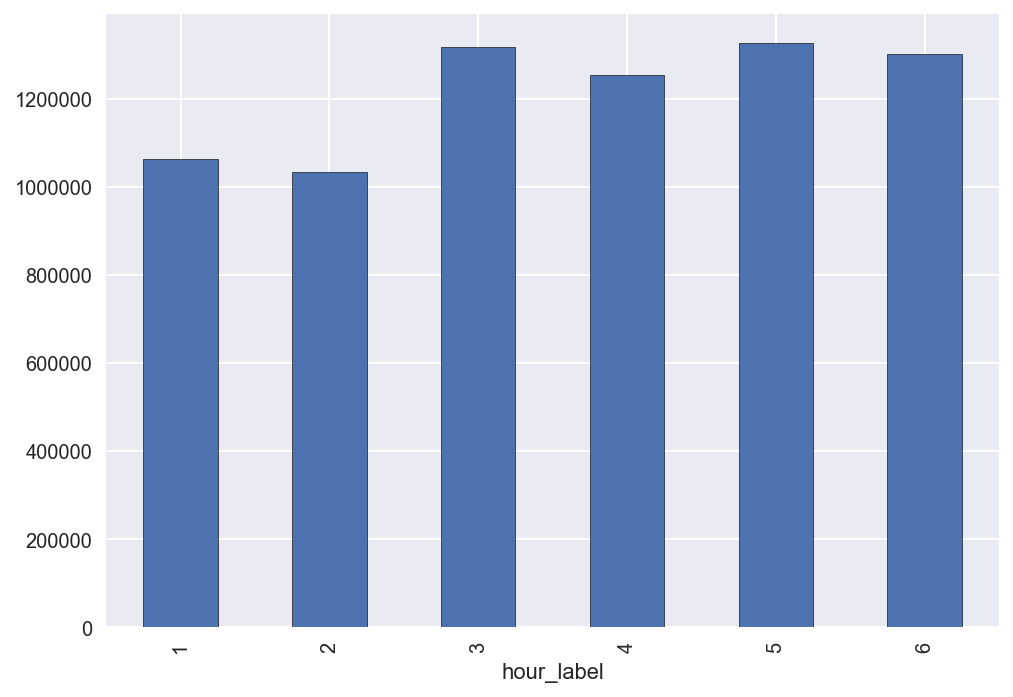

In [28]:
new_data.groupby(new_data['hour_label']).size().plot(kind='bar')


# Trip distance labels

6 classes comprises the distance of each trip:

    1) 0-1 mile
    2) 1-1.5 miles
    3) 1.5-2 miles
    4) 2-3 miles
    5) 3-6 miles
    6) more than 6 miles

In [29]:
#dist_labels = [1: 0-1 , 2: 1-1.5 , 3: 1.5-2 , 4: 2-3 , 5: 3-6, 6: 6+]
dist_labels = range(1,7)
dist_range_by_label = [[0, 1.0],
                       [1.0,1.5],
                       [1.5, 2.0], 
                       [2.0,3.0], 
                       [3.0,6.0],
                       [6.0,100.0]]

In [30]:
dist_label_list = []
dists = np.array(new_data.trip_distance.values).tolist()

for dist in dists:
    for i, dist_label in enumerate(dist_labels):
        dist_mask = ((dist >= dist_range_by_label[i][0]) & (dist < dist_range_by_label[i][1]))
        if dist_mask is True:
            dist_label_list.append(dist_labels[i])
            dist_mask = None
new_data['trip_distance_label'] = dist_label_list

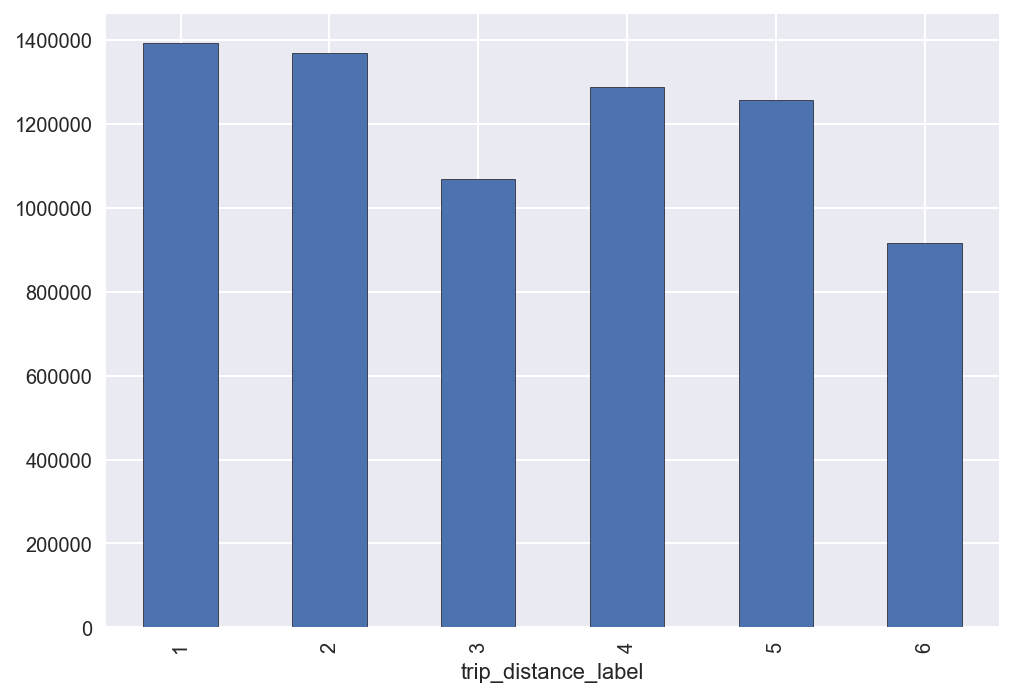

In [31]:
new_data.groupby(new_data['trip_distance_label']).size().plot(kind='bar')

# Fare Amount Labels

Fare amount is categorised into 5 classes:

    1) $0-$6.5
    2) $6.5-$10
    3) $10-$15
    4) $15-$20
    5) more than $20

In [34]:
#fare_labels = [1: 0-6.5, 2: 6.5-10 , 3: 10-15 , 4: 15-20 , 5: 20+]
fare_labels = range(1,6)
fare_range_by_label = [[0, 6.5], 
                       [6.5, 10.0],
                       [10.0, 15.0],
                       [15.0, 20.0],
                       [20.0,100]]

In [35]:
fare_label_list = []
fares = np.array(new_data.fare_amount.values).tolist()

for fare in fares:
    for i, fare_label in enumerate(fare_labels):
        fare_mask = ((fare >= fare_range_by_label[i][0]) & (fare < fare_range_by_label[i][1]))
        if fare_mask is True:
            fare_label_list.append(fare_labels[i])
            fare_mask = None
new_data = new_data.loc[(new_data.fare_amount > 0 ) & (new_data.fare_amount < 100)] 
new_data['fare_amount_label'] = fare_label_list

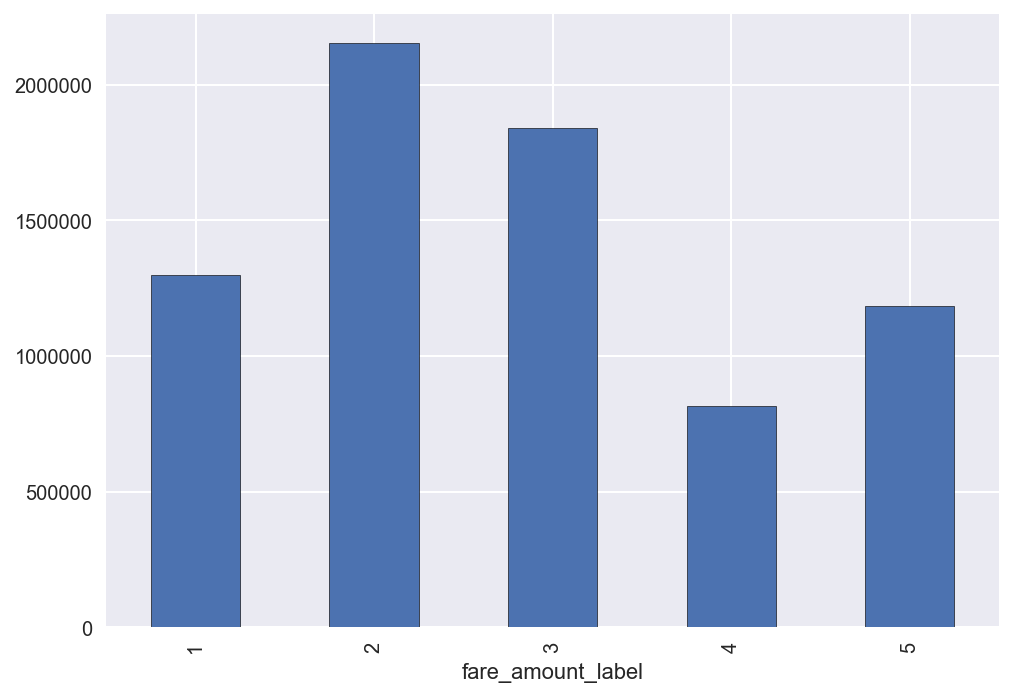

In [36]:
new_data.groupby(new_data['fare_amount_label']).size().plot(kind='bar')

# Total Amount Labels

Fare amount is comprises the following classes:

    1) $0-$10
    2) $10-$15
    3) $15-$20
    4) $20-$25
    5) $25-$35
    6) more than $35

In [37]:
#total_labels = [1: 0-10 , 2: 10-15, 3: 15-20, 4: 20-25, 5: 25-35, 6: 35+]
total_labels = range(1,7)
total_range_by_label = [[0, 10.0], 
                       [10.0, 15.0], 
                       [15.0, 20.0], 
                       [20.0, 25.0],
                       [25.0, 35.0],
                       [35.0, 100]]

In [38]:
total_label_list = []
totals = np.array(new_data.total_amount.values).tolist()

for total in totals:
    for i, total_label in enumerate(total_labels):
        total_mask = ((total >= total_range_by_label[i][0]) & (total < total_range_by_label[i][1]))
        if total_mask is True:
            total_label_list.append(total_labels[i])
            total_mask = None
new_data = new_data.loc[(new_data.total_amount > 0 ) & (new_data.total_amount < 100)] 
new_data['total_amount_label'] = total_label_list

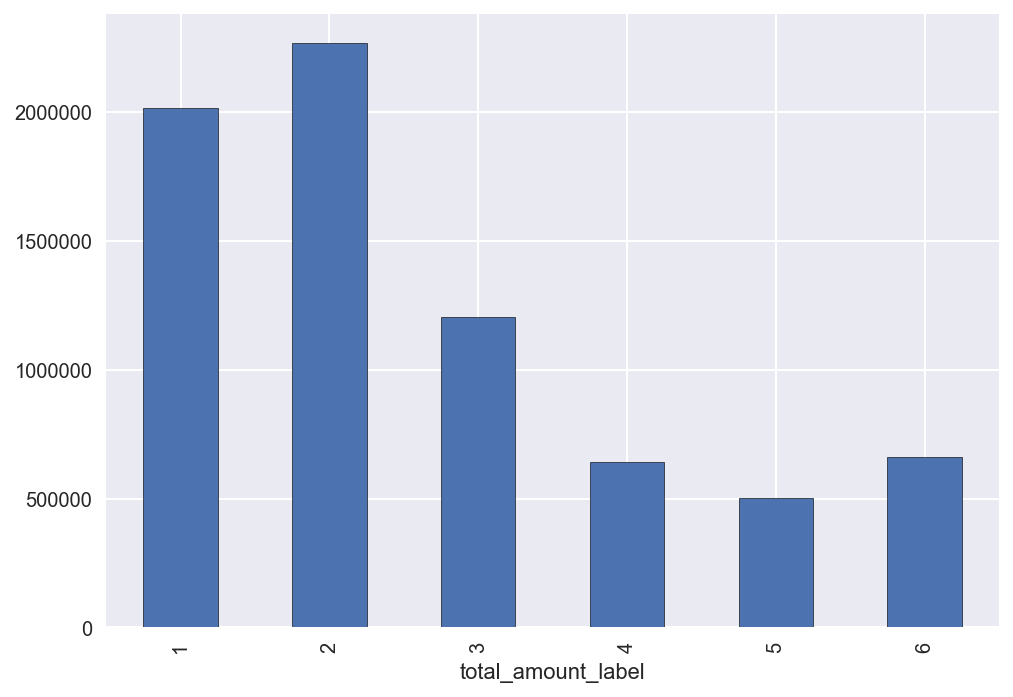

In [39]:
new_data.groupby(new_data['total_amount_label']).size().plot(kind='bar')

# Trip duration Label

Trip duration is categorised in 7 classes:

    1) 0-5 minutes
    2) 5-7 minutes
    3) 7-10 minutes
    4) 10-13 minutes
    5) 13-18 minutes
    6) 18-25 minutes
    7) more than 25 minutes

In [40]:
#duration_labels = [1: 0-5 , 2: 5-7, 3: 7-10, 4: 10-13, 5: 13-18, 6: 18-25, 7:25+]
duration_labels = range(1,8)
duration_range_by_label = [[0, 5.0], 
                           [5.0, 7.0], 
                           [7.0, 10.0], 
                           [10.0, 13.0],
                           [13.0, 18.0],
                           [18.0, 25.0],
                           [25.0, 70.0]]

In [41]:
duration_label_list = []
durations = np.array(new_data.trip_time.values).tolist()

for duration in durations:
    for i, duration_label in enumerate(duration_labels):
        duration_mask = ((duration >= duration_range_by_label[i][0]) & (duration < duration_range_by_label[i][1]))
        if duration_mask is True:
            duration_label_list.append(duration_labels[i])
            duration_mask = None
new_data = new_data.loc[(new_data.trip_time >= 0 ) & (new_data.trip_time < 70)] 
new_data['trip_time_label'] = duration_label_list

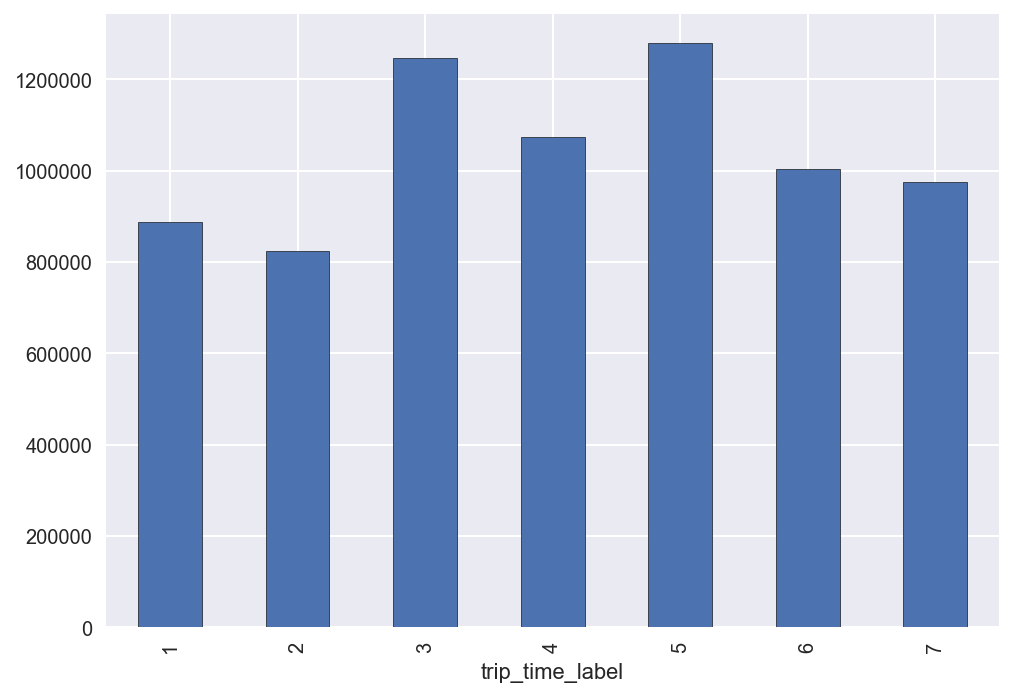

In [42]:
new_data.groupby(new_data['trip_time_label']).size().plot(kind='bar')

# Tip-total proportion feature

The proportion of tip amount vs the total amount considers 5 classes:

    1) 0-16.6%
    2) 16.6%-16.7%
    3) 16.7%-20%
    4) 20%-22%
    5) more than 22%

In [43]:
#tip_labels = ['1: 0-16.6%', '2: 16.6%-16.7%', '3: 16.7%-20%', '4: 20%-22%', '5:+22%']
tip_labels = range(1, 6)


tip_ranges_by_label = [[0, 0.166],
                       [0.166, 0.167], 
                       [0.167, 0.20], 
                       [0.20, 0.22],
                       [0.22,0.70]]


In [44]:
tips_label_list = []
tips = np.array(new_data.dif_tip_total.values).tolist()

for tip in tips:
    for i, tip_label in enumerate(tip_labels):
        tip_mask = ((tip >= tip_ranges_by_label[i][0]) & (tip < tip_ranges_by_label[i][1]))
        if tip_mask is True:
            tips_label_list.append(tip_labels[i])
            tip_mask = None
new_data = new_data.loc[(new_data.dif_tip_total > 0 ) & (new_data.dif_tip_total < 0.7)]            
new_data['tip_label_total'] = tips_label_list

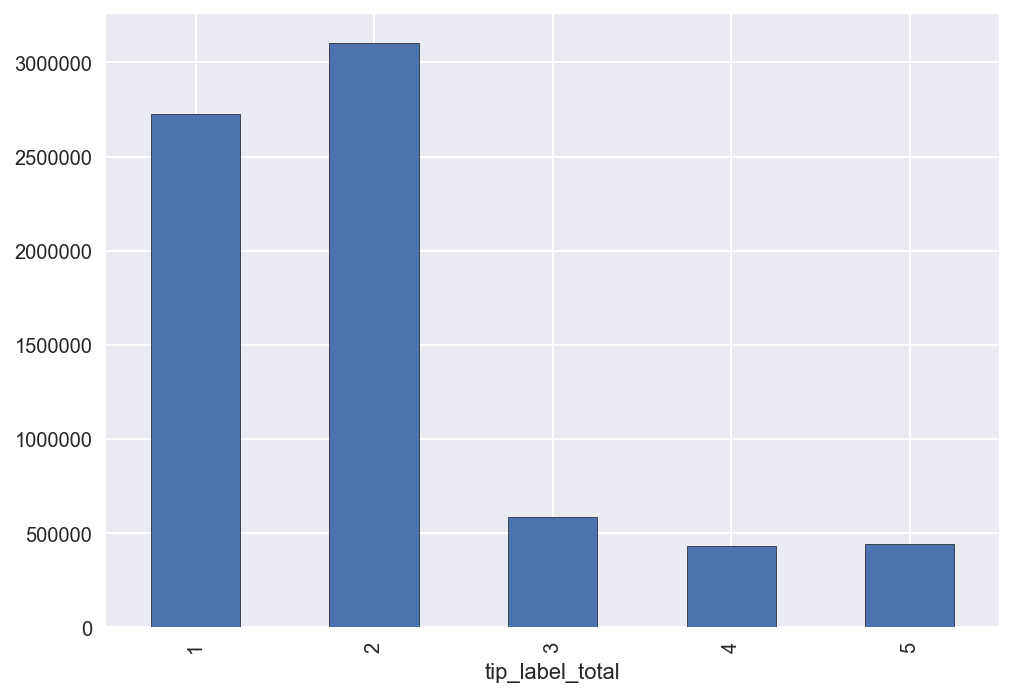

In [45]:
new_data.groupby('tip_label_total').size().plot(kind='bar')

#plt.title('Tip Label Distribution', fontsize=12)
#plt.ylabel('Number of trips')
#plt.tick_params(labelsize=12)

# Tip-fare proportion - Output of the classifier


As tip amount is the main interest of our analysis we focus the solution of our problem to predict the range of tip amount proportion with regards to the fare amount. We set 6 classes for this output:



    1) 0-10%
    2) 10%-20%
    3) 20%-22%
    4) 22%-24%
    5) 24%-30%
    6) more than 30%

In [46]:
#tip_labels = ['1: 0-10%', '2: 10%-20%', '3: 20%-22%', '4: 22%-24%', '5:24%-30%', '6: +30%']
tip_labels = range(1, 7)

tip_ranges_by_label = [[0, 0.1],
                       [0.1, 0.20],
                       [0.20,0.22],
                       [0.22,0.24],
                       [0.24,0.3],
                       [0.3,0.7]]

In [47]:
tips_fare_label_list = []
tips_fare = np.array(new_data.dif_tip_fare.values).tolist()

for tip in tips_fare:
    for i, tip_label in enumerate(tip_labels):
        tip_fare_mask = ((tip >= tip_ranges_by_label[i][0]) & (tip < tip_ranges_by_label[i][1]))
        if tip_fare_mask is True:
            tips_fare_label_list.append(tip_labels[i])
            tip_mask = None
new_data = new_data.loc[(new_data.dif_tip_fare > 0 ) & (new_data.dif_tip_fare < 0.7)]            
new_data['tip_label_fare'] = tips_fare_label_list

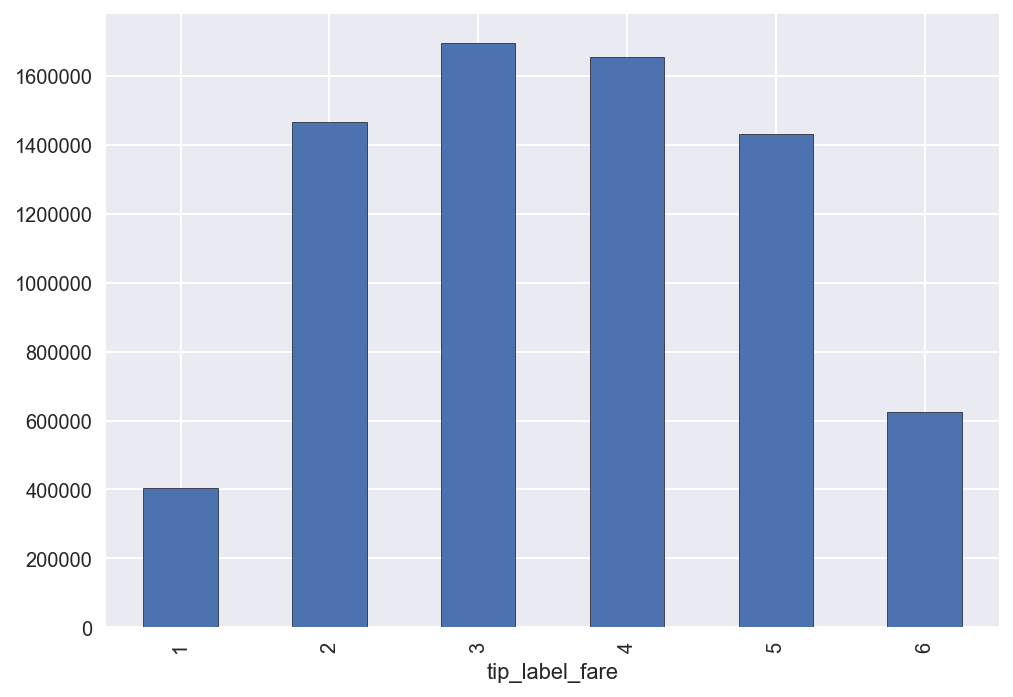

In [48]:
new_data.groupby('tip_label_fare').size().plot(kind='bar')

In [ ]:
new_data.to_csv('labeled_data_yellow_tripdata_2015-06.csv', index=False)
